<a href="https://colab.research.google.com/github/Rishabhc711/Hoaxify/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#INCLUDE LIBRARIES


import numpy as np
import pandas as pd
import re
import itertools
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


from nltk import sent_tokenize, word_tokenize



In [ ]:
from nltk.tokenize import word_tokenize
text = "Hello everyone. You are reading NLP article."
word_tokenize(text)

['Hello', 'everyone', '.', 'You', 'are', 'reading', 'NLP', 'article', '.']

In [ ]:
#Reading the data
df=pd.read_csv('/home/femme_js/Hoaxify/news.csv')

df.head(10)



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
# checking if column have nan values

check_nan_in_df = df.isnull()
print (check_nan_in_df)




      Unnamed: 0  title   text  label
0          False  False  False  False
1          False  False  False  False
2          False  False  False  False
3          False  False  False  False
4          False  False  False  False
...          ...    ...    ...    ...
6330       False  False  False  False
6331       False  False  False  False
6332       False  False  False  False
6333       False  False  False  False
6334       False  False  False  False

[6335 rows x 4 columns]


In [ ]:
# as data dont have any NaN value, we dont need to fill them

In [ ]:
#Getting the Labels

labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
# Combining important features into a single feature

df['total'] = df['title'] + ' ' + df['text']

df.head()

,Unnamed: 0,title,text,label,total
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


In [ ]:
#PRE-PROCESSING THE DATA


In [ ]:

stop_words = stopwords.words('english')

lemmatizer = WordNetLemmatizer()

for index, row in df.iterrows():
    filter_sentence = ''
    sentence = row['total']
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    # Tokenization
    words = nltk.word_tokenize(sentence)
    # Stopwords removal
    words = [w for w in words if not w in stop_words]
    # Lemmatization
    for words in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words)).lower()
    
    df.loc[index, 'total'] = filter_sentence

df.head()

,Unnamed: 0,title,text,label,total
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,smell hillary fear daniel greenfield shillman...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch exact moment paul ryan committed politi...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry go paris gesture sympathy u secretary s...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporter twitter erupt anger dnc trie...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,battle new york primary matter primary day ne...


In [ ]:
df['total'].head()

0     smell hillary fear daniel greenfield shillman...
1     watch exact moment paul ryan committed politi...
2     kerry go paris gesture sympathy u secretary s...
3     bernie supporter twitter erupt anger dnc trie...
4     battle new york primary matter primary day ne...
Name: total, dtype: object

In [ ]:
print(type(df['label']))

<class 'pandas.core.series.Series'>


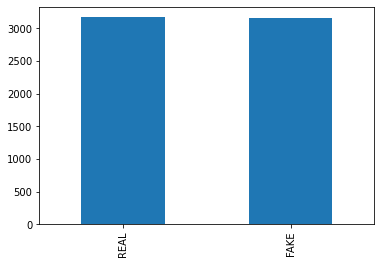

In [ ]:
df['label'].value_counts().plot(kind = 'bar')

In [4]:
df.label = df.label.astype(str)
df.label.unique()


array(['FAKE', 'REAL'], dtype=object)

In [5]:
df.label = df.label.astype(str)
df.label = df.label.str.strip()


dict = { 'REAL' : '1' , 'FAKE' : '0'}

df['label'] = df['label'].map(dict)

df['label'].head()

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: object

In [6]:
x_df = df['total']
y_df = df['label']

In [7]:
x_df.head()

0     you can smell hillarys fear daniel greenfield...
1     watch the exact moment paul ryan committed po...
2     kerry go paris gesture sympathy us secretary ...
3     bernie supporter twitter erupt anger dnc we t...
4     the battle new york why this primary matters ...
Name: total, dtype: object

In [8]:
y_df.head()

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: object

In [9]:
#VECOTRIZATION


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df)
freq_term_matrix = count_vectorizer.transform(x_df)

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

print(tf_idf_matrix)

  (0, 84103)	0.02880344134538735
  (0, 84077)	0.03002128664210717
  (0, 83877)	0.018607343328196482
  (0, 83514)	0.03653774133019167
  (0, 83492)	0.023707364893939736
  (0, 83447)	0.03586754816546842
  (0, 83403)	0.02695875045200971
  (0, 83396)	0.019835943175965133
  (0, 83392)	0.008585159602852022
  (0, 83218)	0.01572657851425174
  (0, 83110)	0.014470516380511316
  (0, 83004)	0.027822220268486773
  (0, 83003)	0.016460792307242865
  (0, 82929)	0.03833530820382529
  (0, 82841)	0.024379366941566442
  (0, 82678)	0.0346212287472953
  (0, 82578)	0.035082475533552405
  (0, 82545)	0.018051125993657446
  (0, 82391)	0.013651104872461956
  (0, 82373)	0.014279148105824169
  (0, 82346)	0.018685412875057213
  (0, 82339)	0.060996642075652405
  (0, 82073)	0.01138273361804669
  (0, 82023)	0.03043943380028792
  (0, 81896)	0.04220672992179989
  :	:
  (6334, 9343)	0.06663788710149954
  (6334, 9341)	0.09390119973816259
  (6334, 9232)	0.01929156802079928
  (6334, 8729)	0.01751752612849853
  (6334, 8631)	0

In [11]:
#Splitting data into train and test data

x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,
                                   y_df, random_state=0)

In [12]:
#Implementing DIfferent Models and checking accuracy


In [13]:
y_train.head()

1957    1
5016    1
3166    1
811     0
3389    1
Name: label, dtype: object

In [14]:
#LOGISTIC REGRESSION


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)

print(Accuracy*100)

91.72979797979798


In [15]:
#NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB


NB = MultinomialNB()
NB.fit(x_train, y_train)
Accuracy = NB.score(x_test, y_test)

print(Accuracy*100)

82.32323232323232


In [16]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
Accuracy = clf.score(x_test, y_test)

print(Accuracy*100)

80.93434343434343


In [17]:
# PASSIVE-AGGRESSIVE CLASSIFIER

from sklearn.metrics import accuracy_score

from sklearn.linear_model import PassiveAggressiveClassifier

#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')




Accuracy: 94.07%


In [18]:
# KNN CLASSIFIER
 
from sklearn.neighbors import KNeighborsClassifier

c2 = KNeighborsClassifier()
c2.fit(x_train, y_train)
Accuracy = c2.score(x_test, y_test)

print(Accuracy*100)

82.51262626262627


In [19]:
# SUPPORT VECTOR CLASSIFIER
 
from sklearn.svm import LinearSVC

c3 = LinearSVC()
c3.fit(x_train, y_train)
Accuracy = c3.score(x_test, y_test)

print(Accuracy*100)

93.81313131313132


In [23]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

c6 = RandomForestClassifier(n_estimators = 70, criterion = 'entropy', random_state = 0)
c6.fit(x_train, y_train)
Accuracy = c6.score(x_test, y_test)

print(Accuracy*100)

90.59343434343434


In [30]:
# ENSEMBLE METHOD - COMBINING ALL MODELS 
from sklearn.ensemble import VotingClassifier

ens1 = VotingClassifier( estimators= [('LR',logreg),('NB',NB),('DT',clf),('PAC',pac),('KNN',c2),('SVC',c3),('RF',c6)], voting = 'hard')


ens1.fit(x_train, y_train)
Accuracy = ens1.score(x_test, y_test)

print(Accuracy*100)

93.43434343434343


No change in the accuracy at all. This just shows that the Naive Bayes, Decision tree and KNN classifier added very little to the accuracy of the ensemble model.

In [39]:
# ENSEMBLE METHOD - COMBINING ALL MODELS THAT HAVE ACCURACY > 90% 

ens2 = VotingClassifier( estimators= [('LR',logreg),('PAC',pac),('SVC',c3),('RF',c6)], voting = 'hard')


ens2.fit(x_train, y_train)
Accuracy = ens2.score(x_test, y_test)

print(Accuracy*100)

93.49747474747475


In [40]:
# ENSEMBLE METHOD - COMBINING ALL MODELS THAT HAVE ACCURACY > 91% 

ens3 = VotingClassifier( estimators= [('LR',logreg),('PAC',pac),('SVC',c3)], voting = 'hard')


ens3.fit(x_train, y_train)
Accuracy = ens3.score(x_test, y_test)

print(Accuracy*100)

93.81313131313132


In [41]:
# ENSEMBLE METHOD - COMBINING top two models

ens4 = VotingClassifier( estimators= [('PAC',pac),('SVC',c3)], voting = 'hard')

ens4.fit(x_train, y_train)
Accuracy = ens4.score(x_test, y_test)

print(Accuracy*100)

93.87626262626263
